In [172]:
import numpy as np
import scipy.signal as sp
import sympy as sym
import matplotlib.pyplot as plt

In [192]:
num = [1.36, -1]
den = [1, -1.73, 0.747]

In [193]:
zeroes = np.roots(num)
zeroes

array([0.73529412])

In [194]:
poles = np.roots(den)
poles

array([0.9 , 0.83])

In [195]:
r = sp.residuez(num, den)[0]
p = sp.residuez(num, den)[1]
k = sp.residuez(num, den)[2]

In [196]:
r

array([-1.84,  3.2 ])

In [197]:
p

array([0.83, 0.9 ])

In [198]:
k

array([], dtype=float64)

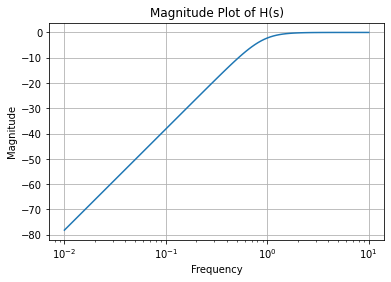

In [180]:
H = sp.lti(num, den)
#plotting Bode magnitude plot
w, mag, phase = sp.bode(H)
plt.semilogx(w, mag)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Magnitude Plot of H(s)')
plt.grid()
plt.show()

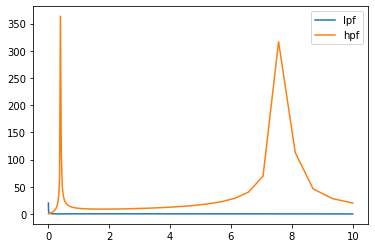

In [181]:
# complex(np.cos(w)+np.sin(w))
omega_list = [x for x in np.linspace(0,np.pi, 100)]
complex_H1 = []
complex_H2 = []
for omega in omega_list:
    H1 = (1*(1+complex(np.cos(-omega)+np.sin(-omega))))/(1-0.9*complex(np.cos(-omega)+np.sin(-omega)))  # better lpf filter
    H2 = (1*(1-complex(np.cos(-omega)+np.sin(-omega))))/(1+0.9*complex(np.cos(-omega)+np.sin(-omega)))  # better lpf filter
    complex_H1.append(np.abs(H1))
    complex_H2.append(np.abs(H2))
plt.plot(w, complex_H1, label='lpf')
plt.plot(w, complex_H2, label='hpf')
plt.legend()
plt.show()

In [209]:
#x(n) = 0.9^n for n>=0
#define function x
def x(n):
    if n >= 0:
        return 0.9**n
    else:
        return 0
#y(n) = 0.83y(n-1) + 1.36x(n) - x(n-1)
#define function y
def y(n):
    if n == 0:
        return 1.36*x(n)
    else:
        return 0.83*y(n-1) + 1.36*x(n) - x(n-1)
y(4)

1.2262868936000002